# # Table of Bets

Mustard Systems have come up with a new strategy for horse racing, and have just completed a test
phase betting small stakes bets before offering it’s strategy to clients. 3200 bets have been made duringn the test and a small profit has been made.

This analysis will be investigating the data in **bet_table.csv** to gain insights on the profitabilty of bets under certain conditions to provide an optimised betting solution to increase profits.

In [26]:
# Import relevant modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Read CSV
df = pd.read_csv('bet_table.csv')
print(df.head())

   Stakes  Odds  Available  Num_Runners Race_Type      Going  Days  \
0       2  2.90         41            6      FLAT  GOOD/SOFT    33   
1       2  7.20       1589           10    HURDLE       FIRM    19   
2       2  1.04        169           14    HURDLE      HEAVY     6   
3       2  2.26         75            9      FLAT       FAST    15   
4       5  1.83        248           16    HURDLE       SOFT    14   

   Bet_Strength  Result  
0             2   LOSER  
1             3  WINNER  
2             2  WINNER  
3             2   LOSER  
4             4   LOSER  


In [77]:
# Create a class that will perform relevant analysis on bet_table.csv. This class can be used on any betting data
class BettingInfo:
    def __init__(self, betting_df):
        # Add a profits columns to the betting data
        calculate_profits = lambda row : (row['Stakes'] * row['Odds']) - row['Stakes']\
        if row['Result'] == 'WINNER'\
        else (-row['Stakes'] if row['Result'] == 'LOSER' else 0)  
        betting_df['Profits'] = betting_df.apply(calculate_profits, axis = 1)
        # Initialise variable to be used for other class functions
        self.df = betting_df
        
    # Function to print the new dataframe
    def print_df(self):
        return self.df

    # Method to calculate the win rate and mean profit for every unique number of runners
    def analyse_num_runners(self):
        # Create a data frame for mean profits for each unique number of runners
        mean_profit_per_num_runners = self.df.groupby('Num_Runners').Profits.mean().reset_index()
        
        # Create a data frame that groups every unique number of runners
        win_rate_per_num_runners = self.df.Result.eq('WINNER').groupby(df.Num_Runners).mean().mul(100).reset_index()
        win_rate_per_num_runners.rename(columns = {
            'Result' : 'Win Rate (%)'
        },inplace = True)
        
        # Inner join both data frames
        num_runners_df = mean_profit_per_num_runners.merge(win_rate_per_num_runners, how = 'inner', on = 'Num_Runners')
        # Rename columns 
        num_runners_df.rename(columns = {
            'Profits' : 'Mean Profit',
        },inplace = True)
        
        # Return data frame.
        return num_runners_df
    
    # Method to calculate the mean profit and win rate for each bet strength value
    def analyse_bet_strength(self):
        # Create data frame for mean profits for each bet strength
        mean_profit_per_bet_strength = self.df.groupby('Bet_Strength').Profits.mean().reset_index()
        
        # Create data frame for the win rate for each bet strength value
        win_rate_per_bet_strength = self.df.Result.eq('WINNER').groupby(df.Bet_Strength).mean().mul(100).reset_index()
        
        # Inner join both data frames
        bet_strength_df = mean_profit_per_bet_strength.merge(win_rate_per_bet_strength, how = 'inner', on = 'Bet_Strength')
        # Rename columns
        bet_strength_df.rename(columns = {
            'Profits': 'Mean Profit',
            'Result': 'Win Rate (%)'
        }, inplace = True)
        
        return bet_strength_df
    
    # Method to calculate the mean profits and win rates for each race type
    def analyse_race_type(self):
        # Create data frame for mean profits for each race type
        mean_profit_per_race_type = self.df.groupby('Race_Type').Profits.mean().reset_index()
        
        # Create data frame for the win rate for each race type
        win_rate_per_race_type = self.df.Result.eq('WINNER').groupby(df.Race_Type).mean().mul(100).reset_index()
        
        # Inner join both data frames and rename columns
        race_type_df = mean_profit_per_race_type.merge(win_rate_per_race_type, how = 'inner', on = 'Race_Type')
        race_type_df.rename(columns = {
            'Result' : 'Win Rate (%)',
            'Profits' : 'Mean Profit'
        },inplace = True)
        
        #Return data frame
        return race_type_df
    
    # Method to calculate the mean profits and win rates for every condition the ground was in
    def analyse_going(self):
        # Create data frame for mean profits for each ground condition
        mean_profit_per_going = self.df.groupby('Going').Profits.mean().reset_index()
        
        # Create data frame for the win rate for each ground condition
        win_rate_per_going = self.df.Result.eq('WINNER').groupby(df.Going).mean().mul(100).reset_index()
        
        # Inner join both data frames and rename columns
        going_df = mean_profit_per_going.merge(win_rate_per_going, how = 'inner', on = 'Going')
        going_df.rename(columns = {
            'Result' : 'Win Rate (%)',
            'Profits' : 'Mean Profit'
        })
        
        # Return data frame
        return going_df
    
    # Method to calculate the mean profits and win rates per day since the horse has last ran 
    def analyse_days(self):
        # Create data frame for mean profits for each day since the horse last run
        mean_profit_per_days = self.df.groupby('Days').Profits.mean().reset_index()
        
        # Create data frame for the win rate for each day since the horse last run
        win_rate_per_days = self.df.Result.eq('WINNER').groupby(df.Days).mean().mul(100).reset_index()
        
        # Inner join both data frames and rename columns
        days_df = mean_profit_per_days.merge(win_rate_per_days, how = 'inner', on = 'Days')
        days_df.rename(columns = {
            'Result' : 'Win Rate (%)',
            'Profits' : 'Mean Profit'
        })
        
        # Return data frame
        return days_df
    
    # Method to calculate the mean profits and win rates for each decimal odds 
    def analyse_odds(self):
        # Create data frame for mean profits for each decimal odds
        mean_profit_per_odds = self.df.groupby('Odds').Profits.mean().reset_index()
        
        # Create data frame for the win rate for each decimal odds
        win_rate_per_odds = self.df.Result.eq('WINNER').groupby(df.Odds).mean().mul(100).reset_index()
        
        # Inner join both data frames and rename columns
        odds_df = mean_profit_per_odds.merge(win_rate_per_odds, how = 'inner', on = 'Odds')
        odds_df.rename(columns = {
            'Result' : 'Win Rate (%)',
            'Profits' : 'Mean Profit'
        })
        
        # Return data frame
        return odds_df
    
    # Method to calculate the mean profits and win rates for each available amount to stake
    def analyse_available(self):
        # Create data frame for mean profits for each available amount to stake
        mean_profit_per_available = self.df.groupby('Available').Profits.mean().reset_index()
        
        # Create data frame for the win rate for each available amount to stake
        win_rate_per_available = self.df.Result.eq('WINNER').groupby(df.Available).mean().mul(100).reset_index()
        
        # Inner join both data frames and rename columns
        available_df = mean_profit_per_available.merge(win_rate_per_available, how = 'inner', on = 'Available')
        available_df.rename(columns = {
            'Result' : 'Win Rate (%)',
            'Profits' : 'Mean Profit'
        })
        
        # Return data frame
        return available_df

To start analysing, an instance of the BettingInfo class will need to be declared with the df (**bet_table.csv**) passed in as the argument.

In [78]:
analyse_bet_data = BettingInfo(df)

In [79]:
num_runners_df = analyse_bet_data.analyse_num_runners()
print(num_runners_df)

    Num_Runners  Mean Profit  Win Rate (%)
0             5    -1.018067     30.252101
1             6    -0.345532     35.815603
2             7    -0.022653     41.079812
3             8     1.803045     43.316832
4             9     0.336000     46.363636
5            10     0.128605     49.224806
6            11     0.145435     42.608696
7            12     0.484423     46.634615
8            13     0.377840     52.469136
9            14     1.613913     59.420290
10           15     0.599469     52.212389
11           16    -0.055566     46.226415
12           17     0.012584     47.191011
13           18     0.343012     53.012048
14           19    -0.287547     37.735849
15           20    -1.133929     37.500000
16           21     0.931346     42.307692
17           22    -1.562000     28.000000
18           23    -0.318421     47.368421
19           24    -2.580000     15.789474
20           25    -0.254000     30.000000
21           26     0.000000      0.000000


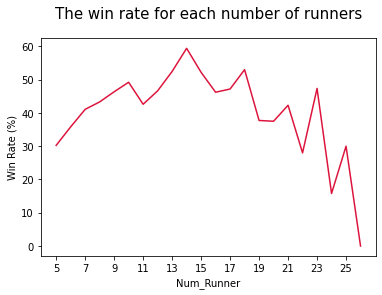

In [80]:
plt.plot(num_runners_df['Num_Runners'], num_runners_df['Win Rate (%)'], color='crimson')
plt.title("The win rate for each number of runners", fontsize=15, pad = 20)
plt.xlabel("Num_Runner")
plt.ylabel("Win Rate (%)")
plt.xticks(np.arange(min(num_runners_df['Num_Runners']), max(num_runners_df['Num_Runners'])+1, 2.0))
plt.show()

From the analysis above, the win rate increased for bets as number of runners increased from 0 to around 9. From there, the win rate significantly decreased at 14 runners and the general trend was negative. 

To optimise the stragedy, bets with number of runners between 13 to 15 should be taken as these were the only bets with a highest win rate or alteast close to that range. High number of runners from 20+ are extremely risky as all 52 bets of number of runners equalling 21 didn't win. As well as vice versa, races with less than 8 runners is significantly riskier.

In [162]:
bet_strength_df = analyse_bet_data.analyse_bet_strength()
print(bet_strength_df)

   Bet_Strength  Mean Profit  Win Rate (%)
0             1    -0.070661     42.011019
1             2    -0.069318     42.519685
2             3     0.114124     44.070081
3             4     1.732556     48.681542
4             5     0.315670     45.154639


Text(0.5, 1.0, 'The win rate of bets for each bet strength value')

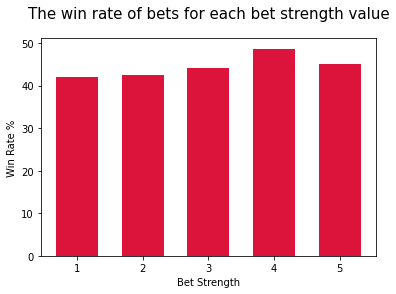

In [163]:
plt.bar(bet_strength_df['Bet_Strength'],bet_strength_df['Win Rate (%)'], width=0.64, color="crimson")
plt.xlabel("Bet Strength")
plt.ylabel("Win Rate %")
plt.title("The win rate of bets for each bet strength value", fontsize = 15, pad = 20)

Generally, bet strength didn't affect the win rate of bets significantly especially between the increase of bet strength from 1 to 2.  However, bet strength 4 performed the best with a 48 percent win rate, but the win rate is still negative (below 50 percent).

It can be concluded that bet strength is not a strong indicator to determine if a bet should be taken or not, however bet strength 4 should be favoured slightly.

In [164]:
race_types_df = analyse_bet_data.analyse_race_type()
print(race_types_df)

  Race_Type  Mean Profit  Win Rate (%)
0     CHASE     0.405124     50.207469
1      FLAT     0.384738     42.577385
2    HURDLE     0.160542     43.657043


Text(0.5, 1.0, 'The win rate of bets for each race type')

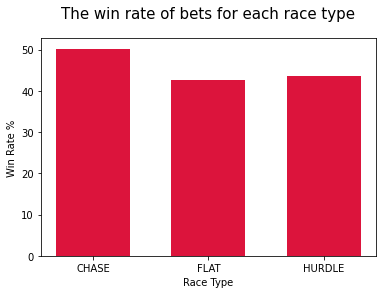

In [165]:
plt.bar(race_types_df['Race_Type'],race_types_df['Win Rate (%)'], width=0.64, color="crimson")
plt.xlabel("Race Type")
plt.ylabel("Win Rate %")
plt.title("The win rate of bets for each race type", fontsize = 15, pad = 20)

Bets with the race type chase performed significantly better than the flat and hurdle race types. Chase race bets had a 50.20% win rate.

It can be concluded, that races with chase as the race type should be favoured to optimise the stragedy. 

In [166]:
going_df = analyse_bet_data.analyse_going()
print(going_df)

       Going   Profits     Result
0       FAST  0.013624  45.414847
1       FIRM  0.714928  46.804124
2      GOOD   0.334381  48.165138
3  GOOD/FIRM  0.196164  46.551724
4  GOOD/SOFT -0.126703  42.456897
5      HEAVY  0.707930  35.511983
6       SOFT  0.298348  43.891403


Text(0.5, 1.0, 'The win rate of bets for each race type')

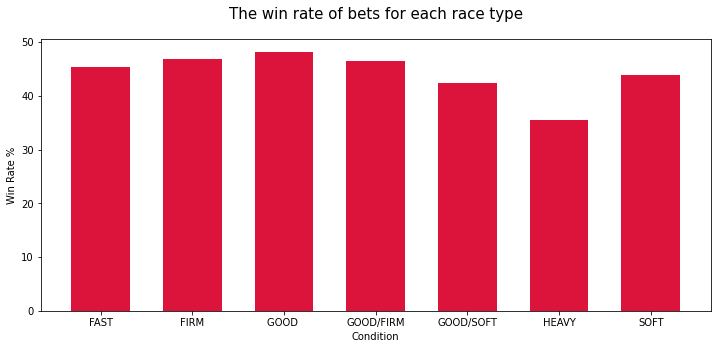

In [167]:
plt.figure(figsize=(12, 5)) 
plt.bar(going_df['Going'],going_df['Result'], width=0.64, color="crimson")
plt.xlabel("Condition")
plt.ylabel("Win Rate %")
plt.title("The win rate of bets for each race type", fontsize = 15, pad = 20)

None of the race conditions prooved to be significantly the best options. FAST, FIRM and GOOD are good choices as they all have win rates near the same range, with GOOD having the highest win rate. GOOD/SOFT, HEAVY and SOFT have noticably lower win rates with heavy being significanltly the worst.

In conclusion, HEAVY races should be avoided to optimise the strategy and GOOD races should be favoured the most. HEAVY AND GOOD/SOFT races seem to impact the win rate the most negatively.

In [168]:
days_df = analyse_bet_data.analyse_days()
print(days_df)

     Days   Profits     Result
0       5 -1.110526  47.368421
1       6 -0.518205  41.025641
2       7 -0.369833  41.666667
3       8  0.528676  58.823529
4       9 -0.344000  40.000000
..    ...       ...        ...
103   115 -5.000000   0.000000
104   116 -5.000000   0.000000
105   118 -5.000000   0.000000
106   121 -2.000000   0.000000
107   125 -2.000000   0.000000

[108 rows x 3 columns]


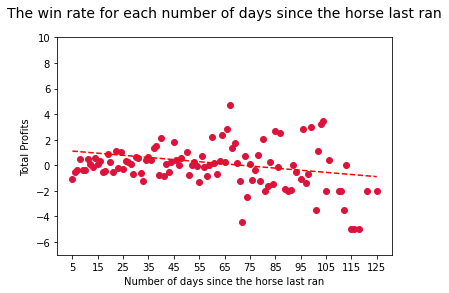

In [169]:
plt.scatter(days_df['Days'], days_df['Profits'], color='crimson')
plt.title("The win rate for each number of days since the horse last ran", fontsize=14, pad = 20)
plt.xlabel("Number of days since the horse last ran")
plt.ylabel("Total Profits")
plt.ylim(-7, 10)
plt.xticks(np.arange(min(days_df['Days']), max(days_df['Days'])+1, 10.0))

# Calculate equation for trendline
z = np.polyfit(days_df['Days'], days_df['Profits'], 1)
p = np.poly1d(z)
plt.plot(days_df['Days'], p(days_df['Days']), 'r--')

plt.show()

From the general trend, as the number of days since the horse last ran increased, the total profits for the corresponding bets decreased. However, the were greater variance in profits past 65 days. This can be expected as the number of odds for those horses can be higher as the likelyness of them winning is lower, resulting in greater profits. 

Inconclusion, horses with a lower number of days should be favoured with days lower than 65 being a good selection. However, this factor should not be the most important when deciding which races to bet on as horses with higher number of days since last ran can provide greater profits due to having greater odds.

In [123]:
odds_df = analyse_bet_data.analyse_odds()
print(odds_df)

       Odds   Profits      Result
0      1.01  0.029231  100.000000
1      1.02 -0.420000   86.666667
2      1.03 -0.074167   91.666667
3      1.04 -0.021176   94.117647
4      1.05 -0.056250   95.833333
..      ...       ...         ...
240  500.00 -2.545455    0.000000
241  600.00 -3.285714    0.000000
242  700.00 -2.266667    0.000000
243  800.00 -2.937500    0.000000
244  900.00 -2.750000    0.000000

[245 rows x 3 columns]


In [150]:
available_df = analyse_bet_data.analyse_available()
print(available_df)

      Available   Profits      Result
0             2  0.230370   44.444444
1             3  3.011304   47.826087
2             4  0.353333   44.444444
3             5 -1.186389   38.888889
4             6  0.112727   48.484848
...         ...       ...         ...
1011       2041 -2.000000    0.000000
1012       2054  0.840000  100.000000
1013       2077 -2.000000    0.000000
1014       2148  4.950000  100.000000
1015       2150 -2.000000    0.000000

[1016 rows x 3 columns]


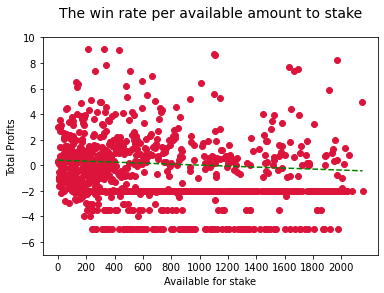

In [159]:
plt.scatter(available_df['Available'], available_df['Profits'], color='crimson')
plt.title("The win rate per available amount to stake", fontsize=14, pad = 20)
plt.xlabel("Available for stake")
plt.ylabel("Total Profits")
plt.ylim(-7, 10)
plt.xticks(np.arange(min(available_df['Available']) - 2, max(available_df['Available']) + 2, 200.0))

# Calculate equation for trendline
z = np.polyfit(available_df['Available'], available_df['Profits'], 1)
p = np.poly1d(z)
plt.plot(available_df['Available'], p(available_df['Available']), 'g--')

plt.show()

From the gereral trend, as the avalialbe amount to stake increased, the total profits decreased. Therefore, it is best to choose races where the available amount to stake is lower.

In [161]:
odds_df['Odds'].describe()

count    245.000000
mean      30.181633
std      113.464745
min        1.010000
25%        1.620000
50%        2.460000
75%        5.400000
max      900.000000
Name: Odds, dtype: float64